In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ast

import matplotlib.pyplot as plt
import numpy as np

from configs import load_configs, load_experimental_results

In [3]:
all_configs = load_configs("debug_experiment")
res = load_experimental_results(all_configs)
final_res = load_experimental_results(all_configs, final=True)

In [4]:
columns = [col for col in res.columns if col not in ['seed', 'id', 'loss', 'weighted_loss']]

In [39]:
mean = final_res.groupby(columns)[['loss', 'weighted_loss']].mean().reset_index()
std = final_res.groupby(columns)[['loss', 'weighted_loss']].std().reset_index()

mean['input_divisors'] = mean['input_divisors'].apply(lambda x: np.array(ast.literal_eval(x)))
mean['output_divisors'] = (mean['input_divisors'] * mean['compression_rate']).apply(lambda x: np.ceil(x).astype(int))
mean['complexity'] = (mean['input_divisors'] * mean['output_divisors']).apply(lambda x: x.sum())
mean['nb_factors'] = mean['input_divisors'].apply(lambda x: x.size)

for name in ['complexity', 'nb_factors']:
    std[name] = mean[name]

# mean.loc[mean['random'] == True, 'complexity'] = 2000
random_mean = mean[mean['random'] == True]
random_std = std[std['random'] == True]

mean = mean[mean['random'] == False]
std = std[std['random'] == False]

In [40]:
mean.set_index('complexity', inplace=True)
std.set_index('complexity', inplace=True)

mean.sort_index(inplace=True)
std.sort_index(inplace=True)

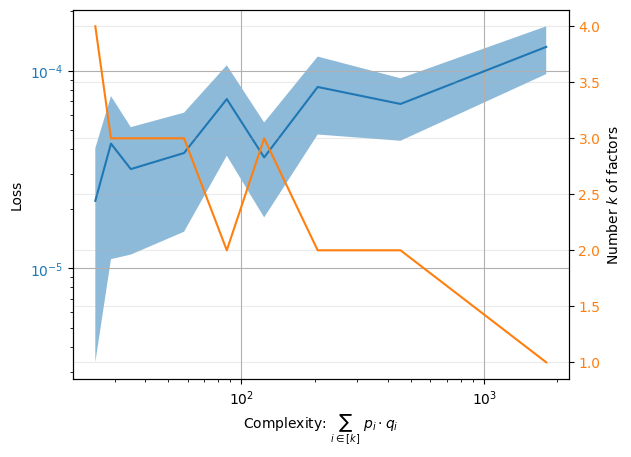

In [53]:
name = 'loss'

fig, ax = plt.subplots()
color = 'C0'
ax.plot(mean[name], color=color)
ax.fill_between(mean.index, mean[name] - std[name], mean[name] + std[name], alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'Complexity: $\sum_{i\in[k]} \ p_i\cdot q_i$')
ax.set_ylabel('Loss')
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'C1'
ax2.plot(mean['nb_factors'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel(r'Number $k$ of factors')

ax.grid()
ax2.grid(alpha=0.25)

In [54]:
random_mean

,input_divisors,output_divisors,compression_rate,random,emb_dim,ffn_dim,nb_layers,learning_rate,epoch,loss,weighted_loss,complexity,nb_factors
1,"[[2, 2, 15]]","[[1, 1, 8]]",0.5,True,32,64,1,0.1,1000,0.000723,0.000366,124,3
3,"[[2, 2, 3, 5]]","[[1, 1, 2, 3]]",0.5,True,32,64,1,0.1,1000,0.000723,0.000366,25,4
5,"[[2, 3, 10]]","[[1, 2, 5]]",0.5,True,32,64,1,0.1,1000,0.000723,0.000366,58,3
7,"[[2, 30]]","[[1, 15]]",0.5,True,32,64,1,0.1,1000,0.000723,0.000366,452,2
9,"[[2, 5, 6]]","[[1, 3, 3]]",0.5,True,32,64,1,0.1,1000,0.000723,0.000366,35,3
11,"[[3, 20]]","[[2, 10]]",0.5,True,32,64,1,0.1,1000,0.000723,0.000366,206,2
13,"[[3, 4, 5]]","[[2, 2, 3]]",0.5,True,32,64,1,0.1,1000,0.000723,0.000366,29,3
15,"[[5, 12]]","[[3, 6]]",0.5,True,32,64,1,0.1,1000,0.000723,0.000366,87,2
17,[[60]],[[30]],0.5,True,32,64,1,0.1,1000,0.000723,0.000366,1800,1


In [55]:
mean

,input_divisors,output_divisors,compression_rate,random,emb_dim,ffn_dim,nb_layers,learning_rate,epoch,loss,weighted_loss,nb_factors
complexity,,,,,,,,,,,,
25,"[[2, 2, 3, 5]]","[[1, 1, 2, 3]]",0.5,False,32,64,1,0.1,1000,0.000022,0.000002,4
29,"[[3, 4, 5]]","[[2, 2, 3]]",0.5,False,32,64,1,0.1,1000,0.000043,0.000002,3
35,"[[2, 5, 6]]","[[1, 3, 3]]",0.5,False,32,64,1,0.1,1000,0.000032,0.000002,3
58,"[[2, 3, 10]]","[[1, 2, 5]]",0.5,False,32,64,1,0.1,1000,0.000038,0.000002,3
87,"[[5, 12]]","[[3, 6]]",0.5,False,32,64,1,0.1,1000,0.000072,0.000003,2
124,"[[2, 2, 15]]","[[1, 1, 8]]",0.5,False,32,64,1,0.1,1000,0.000036,0.000002,3
206,"[[3, 20]]","[[2, 10]]",0.5,False,32,64,1,0.1,1000,0.000083,0.000003,2
452,"[[2, 30]]","[[1, 15]]",0.5,False,32,64,1,0.1,1000,0.000068,0.000003,2
1800,[[60]],[[30]],0.5,False,32,64,1,0.1,1000,0.000132,0.000005,1
